# Uniform Cost Search (UCS)

In [ ]:
import heapq as hq
import math

In [2]:
def ucs(G, s, t):
    n = len(G)
    path    = [None]*n
    visited = [False]*n
    weight  = [math.inf]*n
    queue   = []
    hq.heappush(queue, (0, s))
    weight[s] = 0
    
    while len(queue) > 0:
        g, u = hq.heappop(queue)
        if visited[u]: continue
        visited[u] = True
        for v, w in G[u]:
            if not visited[v]:
                f = g + w
                if f < weight[v]:
                    weight[v] = f
                    path[v] = u
                    hq.heappush(queue, (f, v))
                    
    return path

In [3]:
G = [[(3, 10), (4,  1)],
     [(3,  5), (4,  5)],
     [(3,  5), (4, 15)],
     [(0, 10), (1,  5), (2,  5)],
     [(0,  1), (1,  5), (2, 15)]]

names = ['A', 'B', 'C', 'G', 'S']

In [4]:
path = ucs(G, 4, 3)

In [5]:
print(path)

[4, 4, 4, 1, None]


In [17]:
end = 3
while end != None:
    print(names[end], end=' ')
    end = path[end]
print()

G B S 


In [20]:
G = []
with open('graph1.in') as file:
    for line in file:
        verts = line.split(',')
        G.append([])
        for v in verts:
            G[-1].append(tuple(int(x) for x in v.strip().split(' ')))
            
for l in G:
    print(l)

[(2, 3), (4, 2)]
[(5, 9)]
[(0, 3), (4, 2), (5, 5)]
[(5, 1)]
[(0, 2), (2, 2), (7, 8)]
[(1, 9), (2, 5), (3, 1), (6, 6), (7, 3)]
[(5, 6), (7, 4)]
[(4, 8), (5, 3), (6, 4)]


In [15]:
import graphviz as gv

def drawAL(G):
    dot = gv.Digraph(comment='Nada')
    n = len(G)
    for u in range(n):
        dot.node(str(u), str(u))
    
    for u in range(n):
        for v, w in G[u]:
            dot.edge(str(u), str(v))
    dot.graph_attr['rankdir'] = 'BT'
    return dot

[[(2, 3), (4, 2)], [(5, 9)], [(0, 3), (4, 2), (5, 5)], [(5, 1)], [(0, 2), (2, 2), (7, 8)], [(1, 9), (2, 5), (3, 1), (6, 6), (7, 3)], [(5, 6), (7, 4)], [(4, 8), (5, 3), (6, 4)]]


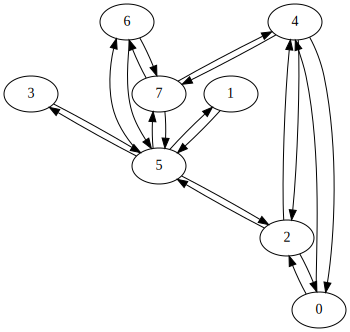

In [16]:
print(G)
drawAL(G)

In [18]:
path = ucs(G, 0, 6)

In [19]:
end = 6
while end != None:
    print(end, end=' ')
    end = path[end]
print()

6 5 2 0 
